In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [223]:
df = pd.read_csv("../resultados_escolas.csv")
df.head()

,DIRETORIA_ENSINO,SEMESTRE,ALUNOS_INGLES,ALUNOS_ESPANHOL,ALUNOS_FRANCES,ALUNOS_MANDARIM
0,SUL 1,2019-1,84,175,53,0
1,FRANCA,2019-1,207,734,59,0
2,MAUA,2019-1,152,846,0,0
3,SANTO ANASTACIO,2019-1,0,19,0,0
4,SUL 3,2019-1,253,998,48,0


## Inglês

In [224]:
# ordenar por semestre e remover a coluna de alunos estudando mandarim e francês
df = df.sort_values(by=['DIRETORIA_ENSINO', 'SEMESTRE']).reset_index(drop=True).drop(['ALUNOS_MANDARIM', 'ALUNOS_FRANCES'], axis=1)
df_pivot = df.pivot(index='DIRETORIA_ENSINO', columns='SEMESTRE', values='ALUNOS_INGLES').dropna()
df_pivot.head()

SEMESTRE,2019-1,2019-2,2020-1,2020-2,2021-1,2021-2,2022-1,2022-2,2023-1,2023-2
DIRETORIA_ENSINO,,,,,,,,,,
ADAMANTINA,53.0,57.0,56.0,50.0,25.0,25.0,24.0,23.0,0.0,0.0
ARACATUBA,174.0,101.0,106.0,106.0,72.0,72.0,170.0,122.0,93.0,128.0
ARARAQUARA,170.0,154.0,322.0,322.0,115.0,115.0,224.0,158.0,305.0,219.0
ASSIS,94.0,57.0,35.0,35.0,43.0,43.0,38.0,33.0,106.0,60.0
AVARE,113.0,125.0,121.0,121.0,32.0,32.0,56.0,50.0,82.0,49.0


In [225]:
# Redefinir o índice para melhor manipulação
df_pivot.reset_index(inplace=True)

# Remover a palavra SEMESTRE das colunas
df_pivot.columns.name = None 
df_pivot.head()

,DIRETORIA_ENSINO,2019-1,2019-2,2020-1,2020-2,2021-1,2021-2,2022-1,2022-2,2023-1,2023-2
0,ADAMANTINA,53.0,57.0,56.0,50.0,25.0,25.0,24.0,23.0,0.0,0.0
1,ARACATUBA,174.0,101.0,106.0,106.0,72.0,72.0,170.0,122.0,93.0,128.0
2,ARARAQUARA,170.0,154.0,322.0,322.0,115.0,115.0,224.0,158.0,305.0,219.0
3,ASSIS,94.0,57.0,35.0,35.0,43.0,43.0,38.0,33.0,106.0,60.0
4,AVARE,113.0,125.0,121.0,121.0,32.0,32.0,56.0,50.0,82.0,49.0


In [226]:
# df com apenas o primeiro semestre e o ultimo do dataset
df_comparacao = df_pivot[['DIRETORIA_ENSINO', '2019-1', '2023-2']]

# inserir coluna com a diferença da qtd de alunos 
df_comparacao['DIFERENCA'] = df_comparacao['2023-2'] - df_comparacao['2019-1']
df_comparacao['DIFERENCA_PCT'] = (df_comparacao['2023-2'] - df_comparacao['2019-1']) / df_comparacao['2019-1']
df_comparacao.head()

,DIRETORIA_ENSINO,2019-1,2023-2,DIFERENCA,DIFERENCA_PCT
0,ADAMANTINA,53.0,0.0,-53.0,-1.000000
1,ARACATUBA,174.0,128.0,-46.0,-0.264368
2,ARARAQUARA,170.0,219.0,49.0,0.288235
3,ASSIS,94.0,60.0,-34.0,-0.361702
4,AVARE,113.0,49.0,-64.0,-0.566372


In [227]:
# Calcular a média me aumento/diminuição de alunos matriculados no estado
media_mudanca = df_comparacao['DIFERENCA_PCT'].mean() * 100
print(f'Entre 2019 e 2023 houve uma diminuição de {media_mudanca:.2f}% de  alunos matriculados em inglês pelo estado.')

Entre 2019 e 2023 houve uma diminuição de -17.19% de  alunos matriculados em inglês pelo estado.


In [228]:
# pegar as 10 diretorias com o maior aumento
df_comparacao_top_10 = df_comparacao.sort_values(by='DIFERENCA', ascending=False).head(10).reset_index(drop=True)
df_comparacao_top_10

,DIRETORIA_ENSINO,2019-1,2023-2,DIFERENCA,DIFERENCA_PCT
0,CENTRO SUL,74.0,275.0,201.0,2.716216
1,SAO BERNARDO DO CAMPO,132.0,250.0,118.0,0.893939
2,TAQUARITINGA,82.0,184.0,102.0,1.243902
3,LESTE 3,208.0,301.0,93.0,0.447115
4,SUL 2,101.0,151.0,50.0,0.495050
5,ARARAQUARA,170.0,219.0,49.0,0.288235
6,OSASCO,89.0,129.0,40.0,0.449438
7,SUL 1,84.0,118.0,34.0,0.404762
8,CATANDUVA,19.0,50.0,31.0,1.631579
9,JAU,62.0,90.0,28.0,0.451613


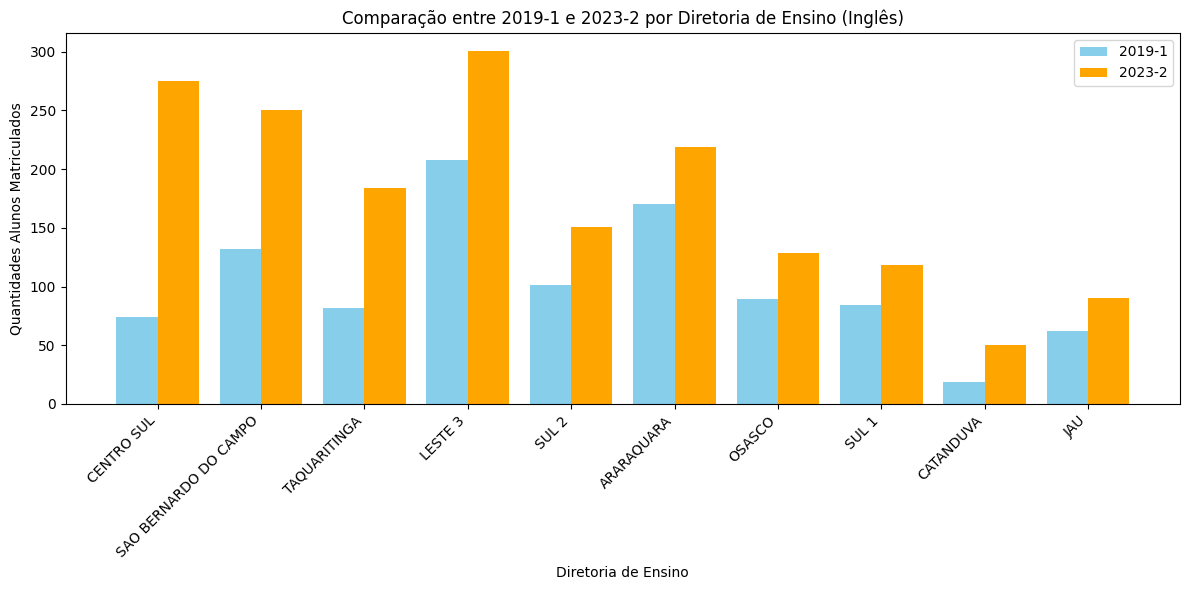

In [229]:
# Definindo o tamanho da figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Definindo a posição das barras no eixo x
x = range(len(df_comparacao_top_10))
largura_barra = 0.4  # Largura das barras

# Plotando as barras para "2019-1" e "2023-2"
ax.bar([pos - largura_barra / 2 for pos in x], df_comparacao_top_10['2019-1'], 
        width=largura_barra, label='2019-1', color='skyblue')
ax.bar([pos + largura_barra / 2 for pos in x], df_comparacao_top_10['2023-2'], 
        width=largura_barra, label='2023-2', color='orange')

# Configurando rótulos e título
ax.set_xlabel('Diretoria de Ensino')
ax.set_ylabel('Quantidades Alunos Matriculados')
ax.set_title('Comparação entre 2019-1 e 2023-2 por Diretoria de Ensino (Inglês)')
ax.set_xticks(x)
ax.set_xticklabels(df_comparacao_top_10['DIRETORIA_ENSINO'], rotation=45, ha='right')

# Exibindo a legenda
ax.legend()

# Mostrando o gráfico
plt.tight_layout()
plt.show()

In [230]:
df_comparacao_bottom_10 = df_comparacao.sort_values(by='DIFERENCA', ascending=True).head(10).reset_index(drop=True)
df_comparacao_bottom_10

,DIRETORIA_ENSINO,2019-1,2023-2,DIFERENCA,DIFERENCA_PCT
0,VOTORANTIM,379.0,47.0,-332.0,-0.875989
1,MOGI DAS CRUZES,349.0,177.0,-172.0,-0.492837
2,GUARULHOS NORTE,249.0,92.0,-157.0,-0.630522
3,SOROCABA,434.0,297.0,-137.0,-0.315668
4,ITAPETININGA,160.0,38.0,-122.0,-0.762500
5,PRESIDENTE PRUDENTE,182.0,65.0,-117.0,-0.642857
6,SUL 3,253.0,139.0,-114.0,-0.450593
7,SAO VICENTE,326.0,218.0,-108.0,-0.331288
8,PIRACICABA,96.0,0.0,-96.0,-1.000000
9,ITU,188.0,92.0,-96.0,-0.510638


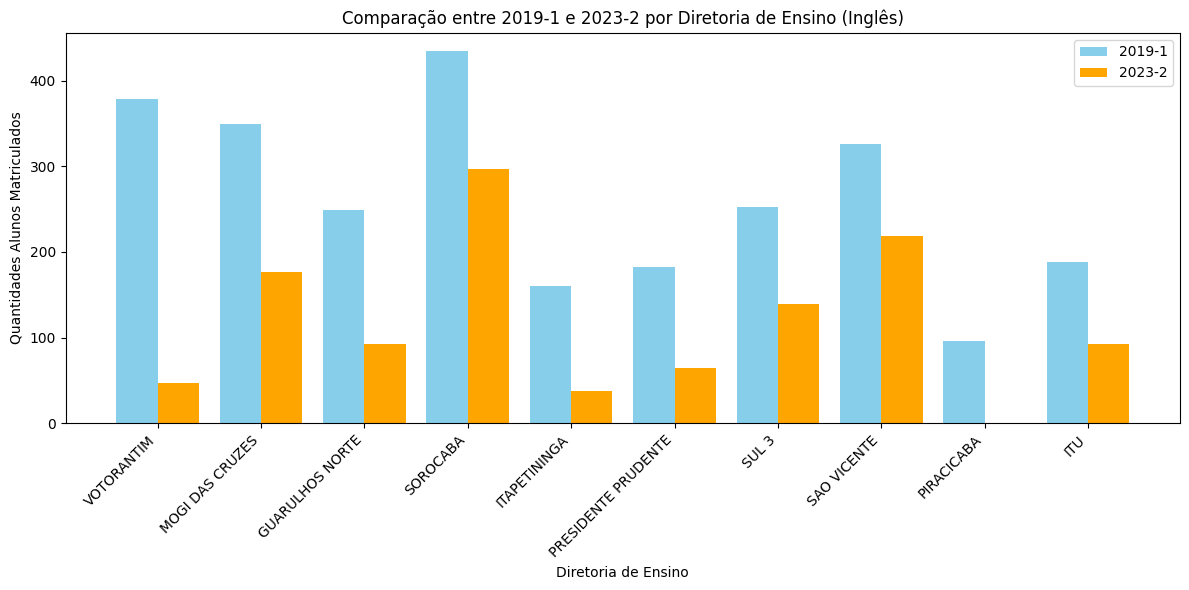

In [231]:
# Definindo o tamanho da figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Definindo a posição das barras no eixo x
x = range(len(df_comparacao_bottom_10))
largura_barra = 0.4  # Largura das barras

# Plotando as barras para "2019-1" e "2023-2"
ax.bar([pos - largura_barra / 2 for pos in x], df_comparacao_bottom_10['2019-1'], 
        width=largura_barra, label='2019-1', color='skyblue')
ax.bar([pos + largura_barra / 2 for pos in x], df_comparacao_bottom_10['2023-2'], 
        width=largura_barra, label='2023-2', color='orange')

# Configurando rótulos e título
ax.set_xlabel('Diretoria de Ensino')
ax.set_ylabel('Quantidades Alunos Matriculados')
ax.set_title('Comparação entre 2019-1 e 2023-2 por Diretoria de Ensino (Inglês)')
ax.set_xticks(x)
ax.set_xticklabels(df_comparacao_bottom_10['DIRETORIA_ENSINO'], rotation=45, ha='right')

# Exibindo a legenda
ax.legend()

# Mostrando o gráfico
plt.tight_layout()
plt.show()

## Espanhol

In [232]:
df_pivot_esp = df.pivot(index='DIRETORIA_ENSINO', columns='SEMESTRE', values='ALUNOS_ESPANHOL').dropna()
df_pivot_esp.head()

SEMESTRE,2019-1,2019-2,2020-1,2020-2,2021-1,2021-2,2022-1,2022-2,2023-1,2023-2
DIRETORIA_ENSINO,,,,,,,,,,
ADAMANTINA,239.0,216.0,225.0,241.0,103.0,114.0,74.0,0.0,9.0,11.0
ARACATUBA,388.0,318.0,338.0,362.0,255.0,274.0,212.0,0.0,192.0,227.0
ARARAQUARA,754.0,842.0,858.0,805.0,675.0,656.0,572.0,0.0,598.0,455.0
ASSIS,477.0,434.0,449.0,350.0,299.0,249.0,222.0,0.0,305.0,293.0
AVARE,322.0,279.0,264.0,297.0,218.0,217.0,154.0,0.0,187.0,181.0


In [233]:
# Redefinir o índice para melhor manipulação
df_pivot_esp.reset_index(inplace=True)

# Remover a palavra SEMESTRE das colunas
df_pivot_esp.columns.name = None 
df_pivot_esp.head()

,DIRETORIA_ENSINO,2019-1,2019-2,2020-1,2020-2,2021-1,2021-2,2022-1,2022-2,2023-1,2023-2
0,ADAMANTINA,239.0,216.0,225.0,241.0,103.0,114.0,74.0,0.0,9.0,11.0
1,ARACATUBA,388.0,318.0,338.0,362.0,255.0,274.0,212.0,0.0,192.0,227.0
2,ARARAQUARA,754.0,842.0,858.0,805.0,675.0,656.0,572.0,0.0,598.0,455.0
3,ASSIS,477.0,434.0,449.0,350.0,299.0,249.0,222.0,0.0,305.0,293.0
4,AVARE,322.0,279.0,264.0,297.0,218.0,217.0,154.0,0.0,187.0,181.0


In [234]:
# df com apenas o primeiro semestre e o ultimo do dataset
df_comparacao_esp = df_pivot_esp[['DIRETORIA_ENSINO', '2019-1', '2023-2']]

# inserir coluna com a diferença da qtd de alunos 
df_comparacao_esp['DIFERENCA'] = df_comparacao_esp['2023-2'] - df_comparacao_esp['2019-1']
df_comparacao_esp['DIFERENCA_PCT'] = (df_comparacao_esp['2023-2'] - df_comparacao_esp['2019-1']) / df_comparacao_esp['2019-1']
df_comparacao_esp.head()

,DIRETORIA_ENSINO,2019-1,2023-2,DIFERENCA,DIFERENCA_PCT
0,ADAMANTINA,239.0,11.0,-228.0,-0.953975
1,ARACATUBA,388.0,227.0,-161.0,-0.414948
2,ARARAQUARA,754.0,455.0,-299.0,-0.396552
3,ASSIS,477.0,293.0,-184.0,-0.385744
4,AVARE,322.0,181.0,-141.0,-0.437888


In [235]:
media_mudanca_esp = df_comparacao_esp['DIFERENCA_PCT'].mean() * 100
print(f'Entre 2019 e 2023 houve uma diminuição de {media_mudanca_esp:.2f}% de  alunos matriculados em espanhol pelo estado.')

Entre 2019 e 2023 houve uma diminuição de -40.49% de  alunos matriculados em espanhol pelo estado.


In [237]:
# pegar as 10 diretorias com o maior aumento
df_comparacao_top_10_esp = df_comparacao_esp.sort_values(by='DIFERENCA', ascending=False).head(10).reset_index(drop=True).dropna()
df_comparacao_top_10_esp

,DIRETORIA_ENSINO,2019-1,2023-2,DIFERENCA,DIFERENCA_PCT
0,TAQUARITINGA,231.0,401.0,170.0,0.735931
1,SAO BERNARDO DO CAMPO,467.0,593.0,126.0,0.269807
2,SUL 1,175.0,276.0,101.0,0.577143
3,ITAPEVA,139.0,190.0,51.0,0.366906
4,RIBEIRAO PRETO,135.0,141.0,6.0,0.044444
6,JAU,270.0,263.0,-7.0,-0.025926
7,CATANDUVA,155.0,136.0,-19.0,-0.122581
8,JACAREI,222.0,201.0,-21.0,-0.094595
9,CENTRO OESTE,263.0,241.0,-22.0,-0.083650


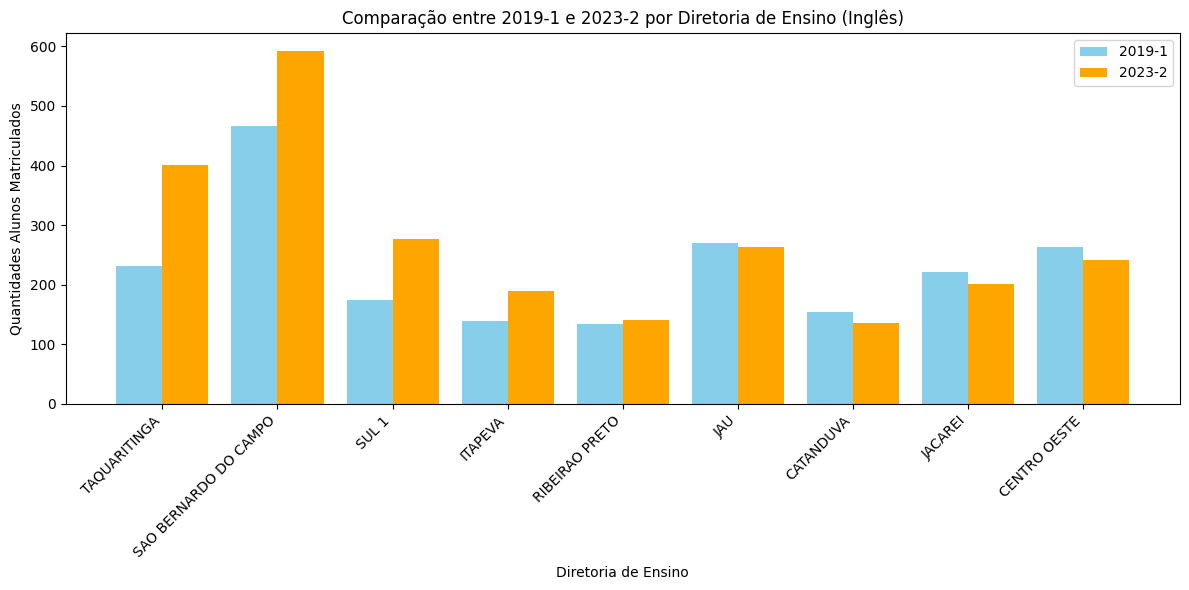

In [ ]:
# Definindo o tamanho da figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Definindo a posição das barras no eixo x
x = range(len(df_comparacao_top_10_esp))
largura_barra = 0.4  # Largura das barras

# Plotando as barras para "2019-1" e "2023-2"
ax.bar([pos - largura_barra / 2 for pos in x], df_comparacao_top_10_esp['2019-1'], 
        width=largura_barra, label='2019-1', color='skyblue')
ax.bar([pos + largura_barra / 2 for pos in x], df_comparacao_top_10_esp['2023-2'], 
        width=largura_barra, label='2023-2', color='orange')

# Configurando rótulos e título
ax.set_xlabel('Diretoria de Ensino')
ax.set_ylabel('Quantidades Alunos Matriculados')
ax.set_title('Comparação entre 2019-1 e 2023-2 por Diretoria de Ensino (Espanhol)')
ax.set_xticks(x)
ax.set_xticklabels(df_comparacao_top_10_esp['DIRETORIA_ENSINO'], rotation=45, ha='right')

# Exibindo a legenda
ax.legend()

# Mostrando o gráfico
plt.tight_layout()
plt.show()

In [239]:
df_comparacao_bottom_10_esp = df_comparacao_esp.sort_values(by='DIFERENCA', ascending=True).head(10).reset_index(drop=True)
df_comparacao_bottom_10_esp

,DIRETORIA_ENSINO,2019-1,2023-2,DIFERENCA,DIFERENCA_PCT
0,SOROCABA,1462.0,671.0,-791.0,-0.541040
1,VOTORANTIM,948.0,255.0,-693.0,-0.731013
2,SUZANO,1182.0,526.0,-656.0,-0.554992
3,ITU,659.0,79.0,-580.0,-0.880121
4,SUL 3,998.0,458.0,-540.0,-0.541082
5,SAO VICENTE,1122.0,648.0,-474.0,-0.422460
6,SUMARE,972.0,528.0,-444.0,-0.456790
7,PINDAMONHANGABA,818.0,391.0,-427.0,-0.522005
8,MOGI DAS CRUZES,961.0,550.0,-411.0,-0.427680
9,CENTRO SUL,868.0,527.0,-341.0,-0.392857


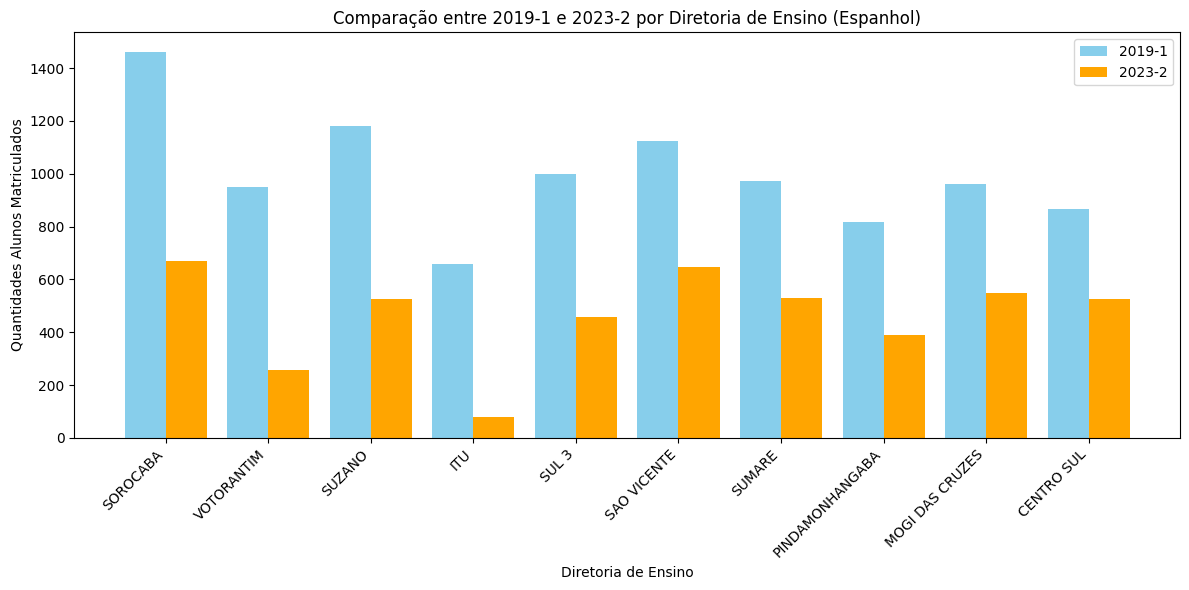

In [242]:
# Definindo o tamanho da figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Definindo a posição das barras no eixo x
x = range(len(df_comparacao_bottom_10_esp))
largura_barra = 0.4  # Largura das barras

# Plotando as barras para "2019-1" e "2023-2"
ax.bar([pos - largura_barra / 2 for pos in x], df_comparacao_bottom_10_esp['2019-1'], 
        width=largura_barra, label='2019-1', color='skyblue')
ax.bar([pos + largura_barra / 2 for pos in x], df_comparacao_bottom_10_esp['2023-2'], 
        width=largura_barra, label='2023-2', color='orange')

# Configurando rótulos e título
ax.set_xlabel('Diretoria de Ensino')
ax.set_ylabel('Quantidades Alunos Matriculados')
ax.set_title('Comparação entre 2019-1 e 2023-2 por Diretoria de Ensino (Espanhol)')
ax.set_xticks(x)
ax.set_xticklabels(df_comparacao_bottom_10_esp['DIRETORIA_ENSINO'], rotation=45, ha='right')

# Exibindo a legenda
ax.legend()

# Mostrando o gráfico
plt.tight_layout()
plt.show()